<a href="https://colab.research.google.com/github/back-sir/restaurant_manager/blob/main/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E2%80%94%E6%88%BF%E4%BB%B7%E9%A2%84%E6%B5%8B_2023_3_6%E5%BC%80%E5%A7%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
df_housing=pd.read_csv("https://raw.githubusercontent.com/huangjia2019/house/master/house.csv")
df_housing.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  ho

引入pandas库，使用pandas的read_csv方法 从括号中的网址中读取到一个公开的csv文件
使用pandas的head方法 head( n ) 方法用于读取前面的 n 行，如果不填参数 n ，默认返回 5 行

[pandas.drop详解](https://www.cnblogs.com/mmmmiles/p/14591406.html)
[pandas.head详解](https://www.runoob.com/pandas/pandas-csv-file.html)

In [3]:
from pandas.core.common import random_state
X=df_housing.drop("median_house_value",axis=1)
y=df_housing.median_house_value
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,
test_size=0.2,random_state=0)


通过pandas的drop方法删除df_housing中的median_house_value一列 将删除后的数据赋值给X  通过pandas的.访问方法将df_houseing数据中的median_house_value一列赋值给y
导入数据处理工具train_test_split 将X和y的数据按2：8的比例拆分为训练数据和测试数据  即X_train X_test和Y_train Y_test 

[train_test_split拆封工具详解](https://blog.csdn.net/Xmumu_/article/details/120677767)
[pandas的.访问方式](https://blog.csdn.net/dQCFKyQDXYm3F8rB0/article/details/124892690)

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression() 
model.fit(X_train,Y_train)

LinearRegression()

选择机器学习模型 由于该事件是线性的房价预测 所以选择线性回归模型 导入线性回归模型LinearRegression  实例化线性回归模型对象model 使用LinearRegression的fit方法拟合X_train 和 Y_train 寻找二者的线性关系

In [5]:
y_pred=model.predict(X_test)
print ('房价的真值(测试集)', Y_test)
print ('预测的房价（测试集）',y_pred)

房价的真值(测试集) 3873     171400.0
3625     189600.0
3028     500001.0
13814    229400.0
15398    163400.0
           ...   
1363     212500.0
7947     210500.0
14574    142900.0
10009    128300.0
9149      84700.0
Name: median_house_value, Length: 3400, dtype: float64
预测的房价（测试集） [211157.06335417 218581.64298574 465317.31295563 ... 201751.23969631
 160873.51846958 138847.26913352]


使用LinearRegression的predict方法 使用拟合出的线性回归方程 输入X_test测试数据 生成y_pred预测数据 将预测数据和实际数据分别输出
观察预测数据和实际数据的差异



In [6]:
print("给预测评分：",model.score(X_test,Y_test))

给预测评分： 0.632101417157948


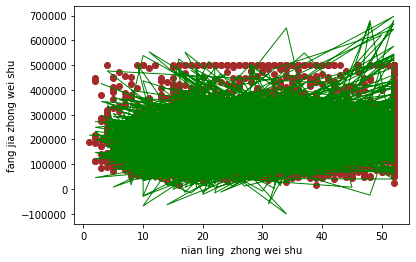

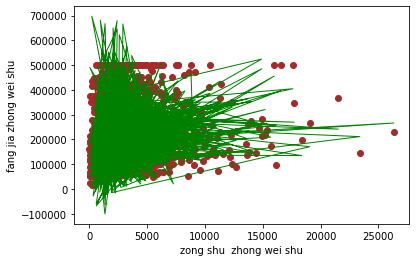

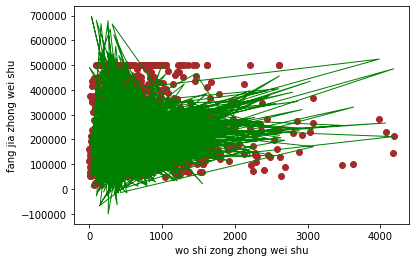

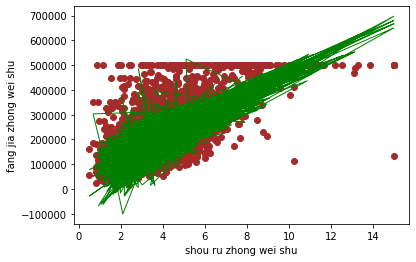

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_test.housing_median_age,Y_test,color='brown')
plt.plot(X_test.housing_median_age,y_pred,color='green',linewidth=1)
plt.xlabel('nian ling  zhong wei shu')
plt.ylabel('fang jia zhong wei shu')
plt.show()
plt.scatter(X_test.total_rooms,Y_test,color='brown')
plt.plot(X_test.total_rooms,y_pred,color='green',linewidth=1)
plt.xlabel('zong shu  zhong wei shu')
plt.ylabel('fang jia zhong wei shu')
plt.show()
plt.scatter(X_test.total_bedrooms,Y_test,color='brown')
plt.plot(X_test.total_bedrooms,y_pred,color='green',linewidth=1)
plt.xlabel('wo shi zong zhong wei shu')
plt.ylabel('fang jia zhong wei shu')
plt.show()
plt.scatter(X_test.median_income,Y_test,color='brown')
plt.plot(X_test.median_income,y_pred,color='green',linewidth=1)
plt.xlabel('shou ru zhong wei shu')
plt.ylabel('fang jia zhong wei shu')
plt.show()

通过导入画图库matplotlib.pyplot 通过该库的scatter方法绘制关于房价中位数和csv表中各个变量的散点图  通过观察各个散点图 寻找不同自变量和房价的关系密切性  通过观察不难看出 家庭收入中位数和房价中位数的线性相关性最好 即家庭收入越高 所住住房房价越贵  这也从侧面解释了富人区形成的原因
[plt.scatter详解](https://blog.csdn.net/qq_36387683/article/details/101378036)